# Creating a politicized dataset
In this notebook we will be creating a dataset of articles leaning to the left and to the right.

We will be using this dataset to train a better ideology predictor and in a crowdsourcing experiment to test the quality of Reddit datasets.

## Import

In [ ]:
import requests
import pandas as pd
import time

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()

drive_service = build('drive', 'v3', cache_discovery=False)

def save_file_to_drive(name, path):
  file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
  }

  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)

  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

  print('File ID: {}'.format(created.get('id')))

  return created

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def upload_from_drive(link, name):
  id = link.split('file/d/')[1].split('/view?usp=sharing')[0]
  downloaded = drive.CreateFile({'id': id}) 
  downloaded.GetContentFile(name) 

## Reddit scraping

In [ ]:
url = "https://api.pushshift.io/reddit/search/submission"

def crawl_page(subreddit: str, sort_by: str, last_page = None):
  
  params = {"subreddit": subreddit, "size": 500, "sort": "desc", "sort_type": sort_by}
  if last_page is not None:
    if len(last_page) > 0:
      # resume from where we left at the last page
      params["before"] = last_page[-1][sort_by]
    else:
      # the last page was empty, we are past the last page
      return []
  results = requests.get(url, params)
  if not results.ok:
    # something wrong happened
    raise Exception("Server returned status code {}".format(results.status_code))
  return results.json()["data"]

def crawl_subreddit(subreddit, sort_by, max_submissions = 10000):
  
  submissions = []
  last_page = None
  while last_page != [] and len(submissions) < max_submissions:
    try:
      last_page = crawl_page(subreddit, sort_by, last_page)
    except:
      break
    submissions += last_page
    print(str(len(submissions)) + str(" posts obtained out of ") + str(max_submissions))
    time.sleep(2)
  return submissions[:max_submissions]


## Chosen subreddits
The choice was made following [this thread](https://www.reddit.com/user/userleansbot/comments/ihkbvm/list_of_political_subreddits_used_by_userleansbot/). I kept the list short for time reasons, but it can be easily expanded with all the other subreddits indicated in there.

Following their work, chosen subreddits are:
 - left-leaning:
   - progressive
   - democrats
   - liberal
   - voteblue
   - joebiden

 - right-leaning:
   - conservative
   - conservatives
   - conservativesOnly
   - republican



In [ ]:
subreddit_list = [
                  'progressive', 'democrats', 'liberal', 'voteblue', 'joebiden',
                  'conservative', 'conservatives', 'conservativesOnly', 'republican'
]

In [ ]:
df = pd.DataFrame()
for subreddit in subreddit_list:
  print("\nDownloading from subreddit ", subreddit)
  print("\n")
  latest_submissions = crawl_subreddit(subreddit, 'created_utc')
  df = pd.concat([df, pd.DataFrame(latest_submissions)])




100 posts obtained out of 10000
200 posts obtained out of 10000
300 posts obtained out of 10000
400 posts obtained out of 10000
500 posts obtained out of 10000
600 posts obtained out of 10000
700 posts obtained out of 10000
800 posts obtained out of 10000
900 posts obtained out of 10000
1000 posts obtained out of 10000
1100 posts obtained out of 10000
1200 posts obtained out of 10000
1300 posts obtained out of 10000
1400 posts obtained out of 10000
1500 posts obtained out of 10000
1600 posts obtained out of 10000
1700 posts obtained out of 10000
1800 posts obtained out of 10000
1900 posts obtained out of 10000
2000 posts obtained out of 10000
2100 posts obtained out of 10000
2200 posts obtained out of 10000
2300 posts obtained out of 10000
2400 posts obtained out of 10000
2500 posts obtained out of 10000
2600 posts obtained out of 10000
2700 posts obtained out of 10000
2800 posts obtained out of 10000
2900 posts obtained out of 10000
3000 posts obtained out of 10000
3100 posts obtai

In [ ]:

df.to_csv('political_reddit_1.csv', index=False)
save_file_to_drive('political_reddit_1.csv', 'political_reddit_1.csv')

File ID: 1WYg0R5l7TWzsO3LT0bXaKdUrJNl288dT


{'id': '1WYg0R5l7TWzsO3LT0bXaKdUrJNl288dT'}

In [ ]:
upload_from_drive('https://drive.google.com/file/d/1W0tuiCZ-Qgtt3eqtEA7ZUHrxC5ZiKcys/view?usp=sharing', 'political_reddit_0.csv')
upload_from_drive('https://drive.google.com/file/d/1WYg0R5l7TWzsO3LT0bXaKdUrJNl288dT/view?usp=sharing', 'political_reddit_1.csv')

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

In [ ]:
df = pd.concat([pd.read_csv('political_reddit_0.csv'), pd.read_csv('political_reddit_1.csv')])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,68,75,76,77,82,83,85,86,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,25,64,74,77,78,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df.drop(df.columns.difference(['domain', 'url', 'subreddit']), axis=1)

In [ ]:
subreddit_info = {
    'progressive': 'left',
    'democrats': 'left',
    'liberal': 'left',
    'voteblue': 'left',
    'joebiden': 'left',
    'conservative': 'right',
    'conservatives': 'right',
    'conservativesonly': 'right',
    'republican': 'right'
}

In [ ]:
df['leaning'] = df['subreddit'].apply(lambda row: subreddit_info[row.lower()])

In [ ]:
df = df.drop(columns=['subreddit'], adxis=1)

In [ ]:
df['dummy'] = 1

In [ ]:
df.groupby('domain').count().sort_values(by='dummy', ascending=False)[:40]

,url,leaning,dummy
domain,,,
i.redd.it,7885,7885,7885
youtu.be,2956,2956,2956
twitter.com,2694,2694,2694
youtube.com,2371,2371,2371
thehill.com,1104,1104,1104
foxnews.com,859,859,859
breitbart.com,727,727,727
redstate.com,710,710,710
thefederalist.com,670,670,670


In [ ]:
df = df[df['domain'].str.startswith('self.') == False]

In [ ]:
df = df[~df['domain'].isin(['i.redd.it', 'reddit.com', 'youtu.be', 'youtube.com','twitter.com', 'imgur.com', 'i.imgur.com', 'google.com', 'realclearpolitics.com'])]

In [ ]:
df.to_csv('political_reddit.csv', index=False)
save_file_to_drive('political_reddit.csv', 'political_reddit.csv')

File ID: 1YMquzUeQ_eAQ-0N5RAED6jA4PnpmXskC


{'id': '1YMquzUeQ_eAQ-0N5RAED6jA4PnpmXskC'}

## Scrape articles
Now that we have the urls, we need to scrape the articles

In [ ]:
df = pd.read_csv('political_reddit.csv')

In [ ]:
!pip install newspaper3k

Since for the experiment I need a small amount of articles, but I want to have them balanced between left and right, I'm going to alternate between the two

In [ ]:
df_left = df[df['leaning'] == 'left']
df_right = df[df['leaning'] == 'right']

In [ ]:
print("Len left: ", len(df_left))
print("Len right: ", len(df_right))

Len left:  16157
Len right:  19140


In [ ]:
from newspaper import Article
from newspaper import Config
import nltk
nltk.download('punkt')

USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = USER_AGENT

articles = []
domains = {}

def retrieveArticles(link, domain):
  
  #To allow a faster scraping process
  if domain in domains:
    if time.time() - domains[domain] < 1:
      time.sleep(1)
  domains[domain] = time.time()

  try:
    article = Article(link, config=config)
    article.download()
    article.parse()
    article.nlp()
  except:
    print("Error with link ", link)
    return
  
  article_info = {}
  article_info['url'] = link
  article_info['publisher'] = domain
  article_info['text'] = article.text

  global articles
  articles.append(article_info)
  print("Retrieved {0}/{1} articles ({2:.2f}%)".format(2500*(index) + len(articles), len(df_left), (2500*(index) + len(articles))*100/len(df_left)))

start_point = 0
finish_point = len(df_left)
step = 2500
index = 0

while start_point < finish_point:
  
  #left
  df_partial_left = df_left[start_point:start_point+step]
  articles = []
  df_partial_left.apply(lambda row: retrieveArticles(row['url'], row['domain']), axis=1)
  pd.DataFrame(articles).to_csv('leftArticles' + str(index) + '.csv', index=False)
  save_file_to_drive('leftArticles' + str(index) + '.csv', 'leftArticles' + str(index) + '.csv')

  #right
  df_partial_right = df_right[start_point:start_point+step]
  articles = []
  df_partial_right.apply(lambda row: retrieveArticles(row['url'], row['domain']), axis=1)
  pd.DataFrame(articles).to_csv('rightArticles' + str(index) + '.csv', index=False)
  save_file_to_drive('rightArticles' + str(index) + '.csv', 'rightArticles' + str(index) + '.csv')

  index += 1
  start_point += step

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Retrieved 1/16157 articles (0.01%)
Retrieved 2/16157 articles (0.01%)
Retrieved 3/16157 articles (0.02%)
Retrieved 4/16157 articles (0.02%)
Retrieved 5/16157 articles (0.03%)
Retrieved 6/16157 articles (0.04%)
Retrieved 7/16157 articles (0.04%)
Retrieved 8/16157 articles (0.05%)
Error with link  https://www.washingtonpost.com/opinions/the-latest-sheer-idiocy-from-conservative-homophobes-boycotting-oreos/2020/10/23/f816fc60-14a6-11eb-bc10-40b25382f1be_story.html
Retrieved 9/16157 articles (0.06%)
Error with link  https://www.washingtonpost.com/opinions/trumps-newest-executive-order-could-prove-one-of-his-most-insidious/2020/10/23/c8223cac-1561-11eb-bc10-40b25382f1be_story.html
Retrieved 10/16157 articles (0.06%)
Retrieved 11/16157 articles (0.07%)
Retrieved 12/16157 articles (0.07%)
Retrieved 13/16157 articles (0.08%)
Retrieved 14/16157 articles (0.09%)
Retrieved 15/16157 artic

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/newspaper/images.py", line 118, in fetch_url
    p.feed(new_data)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 411, in feed
    im = Image.open(fp)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2847, in open
    im = _open_core(fp, filename, prefix)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2833, in _open_core
    im = factory(fp, filename)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 107, in __init__
    self._open()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 279, in _open
    self.load()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 295, in load
    im = self.ico.getimage(self.size)
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 161, in getimage
    return self.frame(self.getentryindex(size, bpp))
  File "/usr/local/

Retrieved 1541/16157 articles (9.54%)
Retrieved 1542/16157 articles (9.54%)
Retrieved 1543/16157 articles (9.55%)
Retrieved 1544/16157 articles (9.56%)
Retrieved 1545/16157 articles (9.56%)
Retrieved 1546/16157 articles (9.57%)
Retrieved 1547/16157 articles (9.57%)
Retrieved 1548/16157 articles (9.58%)
Retrieved 1549/16157 articles (9.59%)
Retrieved 1550/16157 articles (9.59%)
Retrieved 1551/16157 articles (9.60%)
Retrieved 1552/16157 articles (9.61%)
Retrieved 1553/16157 articles (9.61%)
Retrieved 1554/16157 articles (9.62%)
Retrieved 1555/16157 articles (9.62%)
Retrieved 1556/16157 articles (9.63%)
Retrieved 1557/16157 articles (9.64%)
Retrieved 1558/16157 articles (9.64%)
Retrieved 1559/16157 articles (9.65%)
Retrieved 1560/16157 articles (9.66%)
Retrieved 1561/16157 articles (9.66%)
Retrieved 1562/16157 articles (9.67%)
Retrieved 1563/16157 articles (9.67%)
Error with link  https://www.washingtonpost.com/opinions/lets-not-mince-words-the-trump-administration-kidnapped-children/2020

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/newspaper/images.py", line 118, in fetch_url
    p.feed(new_data)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 411, in feed
    im = Image.open(fp)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2847, in open
    im = _open_core(fp, filename, prefix)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2833, in _open_core
    im = factory(fp, filename)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 107, in __init__
    self._open()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 279, in _open
    self.load()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 295, in load
    im = self.ico.getimage(self.size)
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 161, in getimage
    return self.frame(self.getentryindex(size, bpp))
  File "/usr/local/

Output streaming troncato alle ultime 5000 righe.
Retrieved 4439/16157 articles (27.47%)
Retrieved 4440/16157 articles (27.48%)
Retrieved 4441/16157 articles (27.49%)
Retrieved 4442/16157 articles (27.49%)
Retrieved 4443/16157 articles (27.50%)
Retrieved 4444/16157 articles (27.51%)
Retrieved 4445/16157 articles (27.51%)
Retrieved 4446/16157 articles (27.52%)
Retrieved 4447/16157 articles (27.52%)
Retrieved 4448/16157 articles (27.53%)
Retrieved 4449/16157 articles (27.54%)
Retrieved 4450/16157 articles (27.54%)
Retrieved 4451/16157 articles (27.55%)
Retrieved 4452/16157 articles (27.55%)
Retrieved 4453/16157 articles (27.56%)
Retrieved 4454/16157 articles (27.57%)
Retrieved 4455/16157 articles (27.57%)
Error with link  https://www.washingtonpost.com/technology/2020/08/05/trump-facebook-ads-false/
Retrieved 4456/16157 articles (27.58%)
Retrieved 4457/16157 articles (27.59%)
Retrieved 4458/16157 articles (27.59%)
Retrieved 4459/16157 articles (27.60%)
Retrieved 4460/16157 articles (27.6

Building prefix dict from /usr/local/lib/python3.6/dist-packages/jieba/dict.txt ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.5149898529052734 seconds.
Prefix dict has been built succesfully.


Output streaming troncato alle ultime 5000 righe.
Retrieved 6340/16157 articles (39.24%)
Retrieved 6341/16157 articles (39.25%)
Retrieved 6342/16157 articles (39.25%)
Retrieved 6343/16157 articles (39.26%)
Retrieved 6344/16157 articles (39.26%)
Retrieved 6345/16157 articles (39.27%)
Retrieved 6346/16157 articles (39.28%)
Retrieved 6347/16157 articles (39.28%)
Retrieved 6348/16157 articles (39.29%)
Retrieved 6349/16157 articles (39.30%)
Retrieved 6350/16157 articles (39.30%)
Retrieved 6351/16157 articles (39.31%)
Retrieved 6352/16157 articles (39.31%)
Retrieved 6353/16157 articles (39.32%)
Retrieved 6354/16157 articles (39.33%)
Retrieved 6355/16157 articles (39.33%)
Retrieved 6356/16157 articles (39.34%)
Retrieved 6357/16157 articles (39.35%)
Retrieved 6358/16157 articles (39.35%)
Retrieved 6359/16157 articles (39.36%)
Retrieved 6360/16157 articles (39.36%)
Retrieved 6361/16157 articles (39.37%)
Retrieved 6362/16157 articles (39.38%)
Retrieved 6363/16157 articles (39.38%)
Retrieved 6364

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/newspaper/images.py", line 118, in fetch_url
    p.feed(new_data)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 411, in feed
    im = Image.open(fp)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2847, in open
    im = _open_core(fp, filename, prefix)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2833, in _open_core
    im = factory(fp, filename)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 107, in __init__
    self._open()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 279, in _open
    self.load()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 295, in load
    im = self.ico.getimage(self.size)
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 161, in getimage
    return self.frame(self.getentryindex(size, bpp))
  File "/usr/local/

Retrieved 8869/16157 articles (54.89%)
Retrieved 8870/16157 articles (54.90%)
Retrieved 8871/16157 articles (54.90%)
Retrieved 8872/16157 articles (54.91%)
Retrieved 8873/16157 articles (54.92%)
Retrieved 8874/16157 articles (54.92%)
Retrieved 8875/16157 articles (54.93%)
Retrieved 8876/16157 articles (54.94%)
Retrieved 8877/16157 articles (54.94%)
Retrieved 8878/16157 articles (54.95%)
Retrieved 8879/16157 articles (54.95%)
Retrieved 8880/16157 articles (54.96%)
Retrieved 8881/16157 articles (54.97%)
Retrieved 8882/16157 articles (54.97%)
Retrieved 8883/16157 articles (54.98%)
Retrieved 8884/16157 articles (54.99%)
Retrieved 8885/16157 articles (54.99%)
Retrieved 8886/16157 articles (55.00%)
Retrieved 8887/16157 articles (55.00%)
Retrieved 8888/16157 articles (55.01%)
Retrieved 8889/16157 articles (55.02%)
Retrieved 8890/16157 articles (55.02%)
Retrieved 8891/16157 articles (55.03%)
Retrieved 8892/16157 articles (55.03%)
Retrieved 8893/16157 articles (55.04%)
Retrieved 8894/16157 arti

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/newspaper/images.py", line 118, in fetch_url
    p.feed(new_data)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 411, in feed
    im = Image.open(fp)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2847, in open
    im = _open_core(fp, filename, prefix)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2833, in _open_core
    im = factory(fp, filename)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 107, in __init__
    self._open()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 279, in _open
    self.load()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 295, in load
    im = self.ico.getimage(self.size)
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 161, in getimage
    return self.frame(self.getentryindex(size, bpp))
  File "/usr/local/

Retrieved 8921/16157 articles (55.21%)
Retrieved 8922/16157 articles (55.22%)
Retrieved 8923/16157 articles (55.23%)
Retrieved 8924/16157 articles (55.23%)
Retrieved 8925/16157 articles (55.24%)
Retrieved 8926/16157 articles (55.25%)
Retrieved 8927/16157 articles (55.25%)
Retrieved 8928/16157 articles (55.26%)
Retrieved 8929/16157 articles (55.26%)
Retrieved 8930/16157 articles (55.27%)
Retrieved 8931/16157 articles (55.28%)
Retrieved 8932/16157 articles (55.28%)
Retrieved 8933/16157 articles (55.29%)
Retrieved 8934/16157 articles (55.29%)
Error with link  https://www.washingtonpost.com/local/legal-issues/elliott-broidy-plea/2020/10/20/c41ae12c-125a-11eb-ad6f-36c93e6e94fb_story.html
Retrieved 8935/16157 articles (55.30%)
Retrieved 8936/16157 articles (55.31%)
Retrieved 8937/16157 articles (55.31%)
Retrieved 8938/16157 articles (55.32%)
Retrieved 8939/16157 articles (55.33%)
Retrieved 8940/16157 articles (55.33%)
Retrieved 8941/16157 articles (55.34%)
Retrieved 8942/16157 articles (55.3

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/newspaper/images.py", line 118, in fetch_url
    p.feed(new_data)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 411, in feed
    im = Image.open(fp)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2847, in open
    im = _open_core(fp, filename, prefix)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2833, in _open_core
    im = factory(fp, filename)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 107, in __init__
    self._open()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 279, in _open
    self.load()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 295, in load
    im = self.ico.getimage(self.size)
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 161, in getimage
    return self.frame(self.getentryindex(size, bpp))
  File "/usr/local/

Retrieved 9266/16157 articles (57.35%)
Retrieved 9267/16157 articles (57.36%)
Retrieved 9268/16157 articles (57.36%)
Retrieved 9269/16157 articles (57.37%)
Retrieved 9270/16157 articles (57.37%)
Retrieved 9271/16157 articles (57.38%)
Retrieved 9272/16157 articles (57.39%)
Retrieved 9273/16157 articles (57.39%)
Retrieved 9274/16157 articles (57.40%)
Retrieved 9275/16157 articles (57.41%)
Retrieved 9276/16157 articles (57.41%)
Retrieved 9277/16157 articles (57.42%)
Retrieved 9278/16157 articles (57.42%)
Retrieved 9279/16157 articles (57.43%)
Retrieved 9280/16157 articles (57.44%)
Retrieved 9281/16157 articles (57.44%)
Retrieved 9282/16157 articles (57.45%)
Retrieved 9283/16157 articles (57.45%)
Retrieved 9284/16157 articles (57.46%)
Retrieved 9285/16157 articles (57.47%)
Retrieved 9286/16157 articles (57.47%)
Retrieved 9287/16157 articles (57.48%)
Retrieved 9288/16157 articles (57.49%)
Retrieved 9289/16157 articles (57.49%)
Retrieved 9290/16157 articles (57.50%)
Retrieved 9291/16157 arti

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Retrieved 11396/16157 articles (70.53%)
Retrieved 11397/16157 articles (70.54%)
Retrieved 11398/16157 articles (70.55%)
Retrieved 11399/16157 articles (70.55%)
Retrieved 11400/16157 articles (70.56%)
Retrieved 11401/16157 articles (70.56%)
Retrieved 11402/16157 articles (70.57%)
Error with link  https://www.msn.com/en-us/news/politics/three-tubs-of-ballots-discovered-in-mail-processing-center-after-polls-closed-in-wisconsin/ar-BB12laJO
Retrieved 11403/16157 articles (70.58%)
Error with link  https://www.washingtonpost.com/nation/2020/04/10/obama-coronavirus-misinformation/
Retrieved 11404/16157 articles (70.58%)
Retrieved 11405/16157 articles (70.59%)
Retrieved 11406/16157 articles (70.59%)
Retrieved 11407/16157 articles (70.60%)
Error with link  https://www.washingtonpost.com/politics/new-hampshire-gov-sununu-to-allow-absentee-voting-in-november-because-of-coronavirus-outbreak/2020/04/09/d0aa21c8-7aa2-11ea-a130-df573469f094_story.html
Retrieved 11408/16157 articles (70.61%)
Retrieved 

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/newspaper/images.py", line 118, in fetch_url
    p.feed(new_data)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 411, in feed
    im = Image.open(fp)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2847, in open
    im = _open_core(fp, filename, prefix)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2833, in _open_core
    im = factory(fp, filename)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 107, in __init__
    self._open()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 279, in _open
    self.load()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 295, in load
    im = self.ico.getimage(self.size)
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 161, in getimage
    return self.frame(self.getentryindex(size, bpp))
  File "/usr/local/

Retrieved 10349/16157 articles (64.05%)
Retrieved 10350/16157 articles (64.06%)
Retrieved 10351/16157 articles (64.07%)
Retrieved 10352/16157 articles (64.07%)
Retrieved 10353/16157 articles (64.08%)
Retrieved 10354/16157 articles (64.08%)
Retrieved 10355/16157 articles (64.09%)
Retrieved 10356/16157 articles (64.10%)
Retrieved 10357/16157 articles (64.10%)
Retrieved 10358/16157 articles (64.11%)
Retrieved 10359/16157 articles (64.11%)
Retrieved 10360/16157 articles (64.12%)
Retrieved 10361/16157 articles (64.13%)
Retrieved 10362/16157 articles (64.13%)
Retrieved 10363/16157 articles (64.14%)
Retrieved 10364/16157 articles (64.15%)
Retrieved 10365/16157 articles (64.15%)
Retrieved 10366/16157 articles (64.16%)
Retrieved 10367/16157 articles (64.16%)
Retrieved 10368/16157 articles (64.17%)
Retrieved 10369/16157 articles (64.18%)
Retrieved 10370/16157 articles (64.18%)
Retrieved 10371/16157 articles (64.19%)
Retrieved 10372/16157 articles (64.20%)
Retrieved 10373/16157 articles (64.20%)


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/newspaper/images.py", line 118, in fetch_url
    p.feed(new_data)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 411, in feed
    im = Image.open(fp)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2847, in open
    im = _open_core(fp, filename, prefix)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2833, in _open_core
    im = factory(fp, filename)
  File "/usr/local/lib/python3.6/dist-packages/PIL/ImageFile.py", line 107, in __init__
    self._open()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 279, in _open
    self.load()
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 295, in load
    im = self.ico.getimage(self.size)
  File "/usr/local/lib/python3.6/dist-packages/PIL/IcoImagePlugin.py", line 161, in getimage
    return self.frame(self.getentryindex(size, bpp))
  File "/usr/local/

Output streaming troncato alle ultime 5000 righe.
Retrieved 11456/16157 articles (70.90%)
Retrieved 11457/16157 articles (70.91%)
Retrieved 11458/16157 articles (70.92%)
Retrieved 11459/16157 articles (70.92%)
Retrieved 11460/16157 articles (70.93%)
Retrieved 11461/16157 articles (70.94%)
Retrieved 11462/16157 articles (70.94%)
Retrieved 11463/16157 articles (70.95%)
Retrieved 11464/16157 articles (70.95%)
Retrieved 11465/16157 articles (70.96%)
Retrieved 11466/16157 articles (70.97%)
Retrieved 11467/16157 articles (70.97%)
Retrieved 11468/16157 articles (70.98%)
Retrieved 11469/16157 articles (70.98%)
Retrieved 11470/16157 articles (70.99%)
Retrieved 11471/16157 articles (71.00%)
Retrieved 11472/16157 articles (71.00%)
Retrieved 11473/16157 articles (71.01%)
Retrieved 11474/16157 articles (71.02%)
Retrieved 11475/16157 articles (71.02%)
Retrieved 11476/16157 articles (71.03%)
Retrieved 11477/16157 articles (71.03%)
Retrieved 11478/16157 articles (71.04%)
Retrieved 11479/16157 articles

## Analysis on the dataset

In [ ]:
upload_from_drive('https://drive.google.com/file/d/1hz9yb_HGTMvjPk8w8AuBuPxQko6lB9ka/view?usp=sharing', 'leftArticles0.csv')
upload_from_drive('https://drive.google.com/file/d/1pS-uOnXxReogg5dt5M5PrANmjEct-A2G/view?usp=sharing', 'leftArticles1.csv')
upload_from_drive('https://drive.google.com/file/d/12UYQUPlMrgO9BdJCBdwmItC03qSHyfIk/view?usp=sharing', 'leftArticles2.csv')
upload_from_drive('https://drive.google.com/file/d/12UYQUPlMrgO9BdJCBdwmItC03qSHyfIk/view?usp=sharing', 'leftArticles3.csv')
upload_from_drive('https://drive.google.com/file/d/147gWpjNyRUSvJMlPQZMj3pxY96vSrx6Y/view?usp=sharing', 'leftArticles4.csv')
upload_from_drive('https://drive.google.com/file/d/1kkTALrYes3Uj0i4lSJfx4iQhxvvLmrP-/view?usp=sharing', 'leftArticles5.csv')
upload_from_drive('https://drive.google.com/file/d/1fOYPMaLd2tWBbc9tuSLfwuGO0pUx12DK/view?usp=sharing', 'leftArticles6.csv')

In [ ]:
upload_from_drive('https://drive.google.com/file/d/1Ev2vyCKc0jRFMyTGfxZsD0RauS9Q5QvS/view?usp=sharing', 'rightArticles0.csv')
upload_from_drive('https://drive.google.com/file/d/10iP8P2vVfmnRf_oh1GsBhKnfTKDh0q5_/view?usp=sharing', 'rightArticles1.csv')
upload_from_drive('https://drive.google.com/file/d/12j1ZI2-jq4hAqxq6E7HtYMsco21SlnCM/view?usp=sharing', 'rightArticles2.csv')
upload_from_drive('https://drive.google.com/file/d/1w4HRbPyuMjxZXlHyiTjQz2YbbQBRGP9k/view?usp=sharing', 'rightArticles3.csv')
upload_from_drive('https://drive.google.com/file/d/1nynYdC3jOHA2tMHcq82j_iAw2oLPbAvX/view?usp=sharing', 'rightArticles4.csv')
upload_from_drive('https://drive.google.com/file/d/1DvGiHUbsFnEwi_sazFfxrxrBK6vZJslW/view?usp=sharing', 'rightArticles5.csv')
upload_from_drive('https://drive.google.com/file/d/16hr-hyQka-CXbr-YJuKbo9rpPaBal1vD/view?usp=sharing', 'rightArticles6.csv')

In [ ]:
df_left = pd.DataFrame()
for i in range(0,7):
  df_left = pd.concat([df_left, pd.read_csv('leftArticles' + str(i) + '.csv')])

In [ ]:
df_right = pd.DataFrame()
for i in range(0,7):
  df_right = pd.concat([df_right, pd.read_csv('rightArticles' + str(i) + '.csv')])

In [ ]:
len(df_left)

14925

In [ ]:
len(df_right)

17049

In [ ]:
df_left['leaning'] = 'left'
df_right['leaning'] = 'right'

In [ ]:
df_tot = pd.concat([df_left, df_right])

In [ ]:
df_tot['len'] = df_tot['text'].astype(str).apply(len)

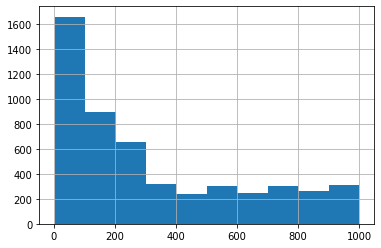

In [ ]:
df_tot[df_tot['len'] < 1000]['len'].hist()

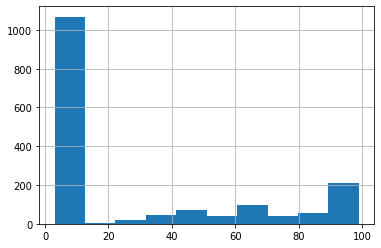

In [ ]:
df_tot[df_tot['len'] < 100]['len'].hist()

In [ ]:
len(df_tot[df_tot['len'] < 200]['len'])

2464

In [ ]:
df_tot[df_tot['len'] < 100]['text'].head().tolist()

[nan,
 nan,
 'JavaScript is disabled\n\nYou need to enable JavaScript to use SoundCloud',
 'Log in to access all of your Bloomberg Law products\n\nSingle Sign-On',
 nan]

In [ ]:
df_tot['wordcount'] = df_tot['text'].astype(str).apply(lambda row: len(row.split(' ')))

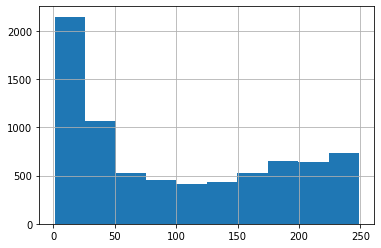

In [ ]:
df_tot[df_tot['wordcount'] < 250]['wordcount'].hist()

In [ ]:
df_tot[df_tot['wordcount'] == 200]['text'].tolist()

['Kyle Meredith With... Tanya Donelly\n\n\ufeff\n\nListen via Apple Podcasts | Spotify | Google Play | Stitcher | Radio Public | RSS\n\n\n\nTanya Donelly speaks with Kyle Meredith about her new covers collaboration with The Parkington Sisters. The collective gives a new spin to classics by Paul McCartney, The Go-Go’s, and Leonard Cohen. Donelly discusses the art of a cover song, her love of Split Enz and Echo & The Bunnymen, and why most of these picks are culled from the ’70s and ’80s. The Breeders and Throwing Muses co-founder also talks about raising money for COVID-19 relief and Black Lives Matter organizations, activism now versus the ’90s, the chances of another Belly album, and a project she’s working on with Dylan In the Movies.\n\nKyle Meredith With… is an interview series in which WFPK’s Kyle Meredith speaks to a wide breadth of musicians. Every Monday, Wednesday, and Friday, Meredith digs deep into the artist’s work to find out how the music is made and where their journey i

In [ ]:
df_tot = df_tot[df_tot['wordcount'] > 100]
df_tot = df_tot[df_tot['wordcount'] < 2500]

In [ ]:
len(df_tot)

26852

In [ ]:
df_final = df_tot.sample(n=1000)

In [ ]:
len(df_final[df_final['leaning'] == 'right'])

541

In [ ]:
df_final.head()

,url,publisher,text,leaning,len,wordcount
1988,https://thehill.com/homenews/administration/52...,thehill.com,White House chief of staff Mark Meadows Mark R...,right,3545,564
839,https://www.foxnews.com/politics/trump-sudan-t...,foxnews.com,President Trump on Friday announced a peace de...,right,5655,906
1283,https://www.foxnews.com/politics/jim-hunter-bi...,foxnews.com,EXCLUSIVE: A list of “key domestic contacts” f...,right,4327,700
2054,https://www.huffpost.com/entry/joe-biden-new-h...,huffpost.com,"HUDSON, N.H. ― Older voters love Joe Biden, bu...",left,6072,1030
483,https://www.thecornellreview.org/cornell-repub...,thecornellreview.org,"On Monday night, the general body of the Corne...",right,3523,550


In [ ]:
df_final['answer_to_give'] = 0
df_final['answer_0'] = 'Not given'
df_final['answer_1'] = 'Not given'
df_final['answer_2'] = 'Not given'

In [ ]:
df_final['answer_to_give'] = df_final['answer_to_give'].astype(int)

In [ ]:
df_final.to_csv('crowdsourcing_reddit.csv')
save_file_to_drive('crowdsourcing_reddit.csv', 'crowdsourcing_reddit.csv')

File ID: 1eTNtqQLf2e4d9aIx9q8LD3NyqG7nCrYz


{'id': '1eTNtqQLf2e4d9aIx9q8LD3NyqG7nCrYz'}

We add summary and title to make it easier to analyze

In [ ]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 2.9MB/s 
     |████████████████████████████████| 92kB 6.9MB/s 
     |████████████████████████████████| 7.4MB 5.3MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=0749e1ab47b8a1d5c279807434ab238590e93331daabc14727afddfe2345051e
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=cd15ffb02c1dcebc9fd7972b59d70438fc799e9dc75c82a105ee6ffa00c6b8ef
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3355 sha256=2202707be3dfe11a841b7234787776f41bb536da4bf02a77c43059936f8ab0a5
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7

In [ ]:
from newspaper import Article
from newspaper import Config
import nltk
nltk.download('punkt')

USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = USER_AGENT

articles = []
domains = {}

row = 0

def retrieve_summary_title(link, domain):
  #To allow a faster scraping process
  if domain in domains:
    if time.time() - domains[domain] < 1:
      time.sleep(1)
  domains[domain] = time.time()

  try:
    article = Article(link, config=config)
    article.download()
    article.parse()
    article.nlp()
  except:
    print("Error with link ", link)
    return
  
  global row
  row += 1
  print("Done {0}/{1} rows ({2:.2f}%)".format(row, len(df_final), row*100/len(df_final)))

  result = '{TITLE}' + article.title + '{SUMMARY}' + article.summary
  return result

df_final['title'] = df_final.apply(lambda row: retrieve_summary_title(row['url'], row['publisher']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Done 1/1000 rows (0.10%)
Done 2/1000 rows (0.20%)
Done 3/1000 rows (0.30%)
Done 4/1000 rows (0.40%)
Done 5/1000 rows (0.50%)
Done 6/1000 rows (0.60%)
Done 7/1000 rows (0.70%)
Done 8/1000 rows (0.80%)
Done 9/1000 rows (0.90%)
Done 10/1000 rows (1.00%)
Done 11/1000 rows (1.10%)
Done 12/1000 rows (1.20%)
Done 13/1000 rows (1.30%)
Done 14/1000 rows (1.40%)
Done 15/1000 rows (1.50%)
Done 16/1000 rows (1.60%)
Done 17/1000 rows (1.70%)
Done 18/1000 rows (1.80%)
Done 19/1000 rows (1.90%)
Done 20/1000 rows (2.00%)
Done 21/1000 rows (2.10%)
Done 22/1000 rows (2.20%)
Done 23/1000 rows (2.30%)
Done 24/1000 rows (2.40%)
Done 25/1000 rows (2.50%)
Done 26/1000 rows (2.60%)
Done 27/1000 rows (2.70%)
Done 28/1000 rows (2.80%)
Done 29/1000 rows (2.90%)
Done 30/1000 rows (3.00%)
Done 31/1000 rows (3.10%)
Done 32/1000 rows (3.20%)
Done 33/1000 rows (3.30%)
Done 34/1000 rows (3.40%)
Done 35/1000 r

In [ ]:
len(df_final[df_final['title'].isna()])
df_final = df_final[~df_final['title'].isna()]

In [ ]:
df_final['summary'] = df_final['title'].apply(lambda row: row.split("{SUMMARY}")[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final['title'] = df_final['title'].apply(lambda row: row.split("{SUMMARY}")[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final['title'] = df_final['title'].apply(lambda row: row.split("{SUMMARY}")[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final['title'] = df_final['title'].apply(lambda row: row.replace("{TITLE}",""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final.head()

,url,publisher,text,leaning,len,wordcount,answer_to_give,answer_0,answer_1,answer_2,title,summary
1988,https://thehill.com/homenews/administration/52...,thehill.com,White House chief of staff Mark Meadows Mark R...,right,3545,564,0,Not given,Not given,Not given,Meadows tempers expectations of Hunter Biden p...,Trump on Tuesday directly pushed Barr to inves...
839,https://www.foxnews.com/politics/trump-sudan-t...,foxnews.com,President Trump on Friday announced a peace de...,right,5655,906,0,Not given,Not given,Not given,Trump announces peace deal between Sudan and I...,President Trump on Friday announced a peace de...
1283,https://www.foxnews.com/politics/jim-hunter-bi...,foxnews.com,EXCLUSIVE: A list of “key domestic contacts” f...,right,4327,700,0,Not given,Not given,Not given,"Harris, prominent Democrats listed as 'key con...",EXCLUSIVE: A list of “key domestic contacts” f...
2054,https://www.huffpost.com/entry/joe-biden-new-h...,huffpost.com,"HUDSON, N.H. ― Older voters love Joe Biden, bu...",left,6072,1030,0,Not given,Not given,Not given,Older Voters Are Getting Worried About Joe Biden,"HUDSON, N.H. ― Older voters love Joe Biden, bu..."
483,https://www.thecornellreview.org/cornell-repub...,thecornellreview.org,"On Monday night, the general body of the Corne...",right,3523,550,0,Not given,Not given,Not given,Cornell Republicans Vote to Endorse Trump and ...,"On Monday night, the general body of the Corne..."


In [ ]:
df_final.to_csv('articles.csv')
save_file_to_drive('articles.csv', 'articles.csv')

File ID: 1KqMUYxfDn-7X6JuPgBHT7oaDmBfyh8J0


{'id': '1KqMUYxfDn-7X6JuPgBHT7oaDmBfyh8J0'}